In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/firstexamegypt/FirstExam.csv


In [23]:
# reading file
firstExam=pd.read_csv("/kaggle/input/firstexamegypt/FirstExam.csv")
firstExam.head()

,desk_no,name,schoolName_Arabic,schoolName_English,administration_Arabic,administration_English,government_Arabic,government_English,branch,Percentage,...,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics,gender
0,102300,احمد محمد احمد محمود ابوالقاسم,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,23,20,unscheduled,M
1,102301,احمد محمد عبدالصادق سلامه,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,23,23,unscheduled,M
2,102302,ادهم اشرف عبدالهادي معاذ,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,17,14,unscheduled,M
3,102303,بيير جون نبيل غالي سعد,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,21,22,unscheduled,M
4,102304,رامي محمود عبدالمنعم شحاته,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,19,21,unscheduled,M


In [24]:
newdf = firstExam[['Percentage', 'government_English','branch']]
newdf = newdf[(newdf.branch !='undefined')]
newdf = newdf[['government_English','Percentage']]
newdf

,government_English,Percentage
3022,Giza,87.80%
3024,Giza,57.32%
3025,Giza,83.41%
3026,Giza,53.17%
3027,Giza,51.46%
...,...,...
698190,Sohag,54.15%
698191,Sohag,62.93%
698192,Sohag,70.98%
698193,Sohag,85.49%


In [25]:
newdf['Percentage']= (newdf['Percentage'].str.split('%', expand= True)[0]).astype('float')

In [32]:
newdf.groupby('government_English').mean().sort_values(by='Percentage' ,ascending=0) # mean by gender

,Percentage
government_English,
North Sinai,74.644571
Dakahlia,72.844990
Port Said,71.974757
Damietta,70.911913
Gharbia,69.212694
South Sinai,68.786480
Sharqia,68.536738
Kafr El Sheikh,67.991388
Ismailia,66.371450


<AxesSubplot:xlabel='Percentage', ylabel='government_English'>

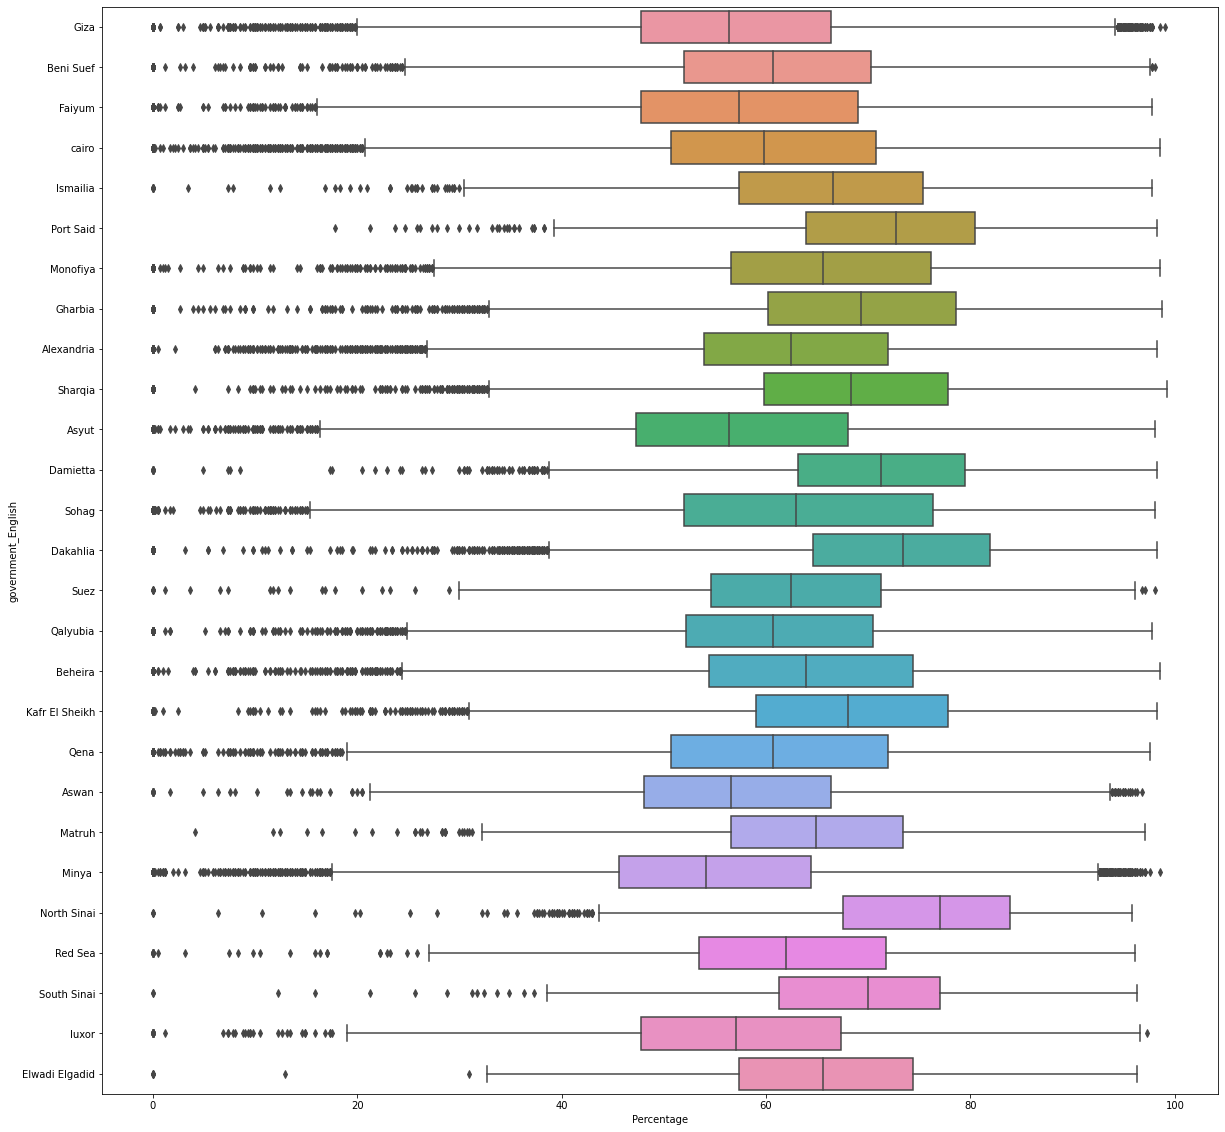

In [27]:
plt.figure(figsize=(20,20))
sns.boxplot(x='Percentage', y='government_English', data= newdf)